In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import pandas as pd

fhv = pd.read_csv('/Users/carolineroper/Documents/Big Data/fhv_tripdata_2015-01.csv')
yellow = pd.read_csv('/Users/carolineroper/Documents/Big Data/yellow_tripdata_2015-01.csv')
green = pd.read_csv('/Users/carolineroper/Documents/Big Data/green_tripdata_2015-01.csv')

In [2]:
green_by_day = \
pd.read_table('/Users/carolineroper/Documents/Big Data/green_by_date_sorted.out', header = -1, skiprows=0)

In [64]:
green_by_day.columns = ['Date', 'Rides Dropped Off']

In [4]:
sum(green_by_day['Rides Dropped Off'])
#19233765 lines in the green_2015 csv, so this perfectly matches

19233765

In [56]:
green_by_day.loc[366,:]

Date             2021-04-03
Rides Started             2
Name: 366, dtype: object

In [62]:
#removing dropoffs in 2021-04-03
#date has 366 rows after removing invalid dropoffs
green_by_day = green_by_day.loc[0:365,:]

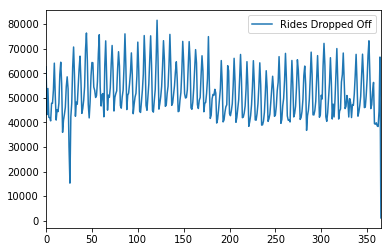

In [65]:
green_by_day.plot()
plt.show()

In [12]:
yellow_by_day = pd.read_table('/Users/carolineroper/Documents/Big Data/yellow_by_date.out', header = -1, skiprows=0)

yellow_by_day.columns = ['Date', 'Rides Dropped Off']

In [45]:
sum(yellow_by_day['Rides Dropped Off']) #146112989 lines in the yellow_2015 csv, so this perfectly matches

146112989

In [46]:
yellow_by_day[yellow_by_day['Date'].astype(str).str[0:4] != '2015']

,Date,Rides Dropped Off
0,1900-01-01,2
1,1973-05-09,1
2,2008-08-07,1
3,2010-01-01,1
4,2012-11-07,1
370,2016-01-01,2363
371,2016-02-02,16
372,2016-08-15,10
373,2016-10-05,1
374,2016-10-12,1


In [47]:
#removing invalid entries
yellow_by_day = yellow_by_day.loc[5:370,:]
#after removing invalid entries, yellow_by_day has 366 rows which is what I'd expect

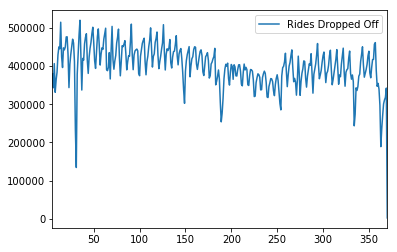

In [48]:
yellow_by_day.plot()

In [71]:
yellow_by_date_pickup = \
pd.read_table('/Users/carolineroper/Documents/Big Data/yellow_by_date_pickup.out', header = -1, skiprows=0)

yellow_by_date_pickup.columns = ['Date', 'Yellow Pickups']

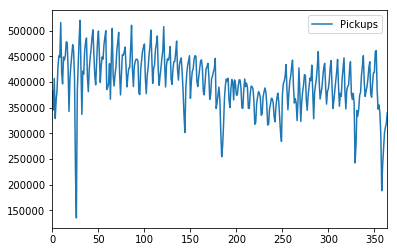

In [52]:
yellow_by_date_pickup.plot()

In [72]:
green_by_date_pickup = \
pd.read_table('/Users/carolineroper/Documents/Big Data/green_by_date_pickup.out', header = -1, skiprows=0)

green_by_date_pickup.columns = ['Date', 'Green Pickups']

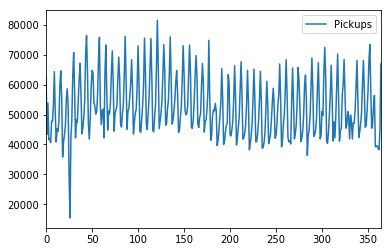

In [35]:
green_by_date_pickup.plot()

In [73]:
fhv_by_date_pickup = \
pd.read_table('/Users/carolineroper/Documents/Big Data/fhv_by_date_pickup.out', header = -1, skiprows=0)

fhv_by_date_pickup.columns = ['Date', 'FHV Pickups']

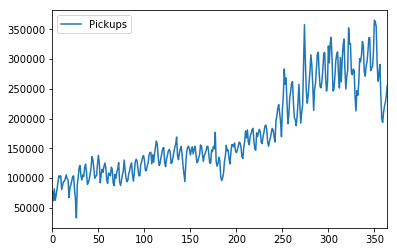

In [33]:
fhv_by_date_pickup.plot()

In [66]:
print (len(fhv_by_date_pickup))
print (len(green_by_date_pickup))
print (len(yellow_by_date_pickup))

365
365
365


In [68]:
print (fhv_by_date_pickup.columns)
print (green_by_date_pickup.columns)
print (yellow_by_date_pickup.columns)

Index(['Date', 'Pickups'], dtype='object')
Index(['Date', 'Pickups'], dtype='object')
Index(['Date', 'Pickups'], dtype='object')


In [86]:
all_companies_pickups = pd.merge(yellow_by_date_pickup, green_by_date_pickup,\
                        on=['Date'])

all_companies_pickups = pd.merge(all_companies_pickups, fhv_by_date_pickup,\
                        on=['Date'])

In [87]:
all_companies_pickups.head()

,Date,Yellow Pickups,Green Pickups,FHV Pickups
0,2015-01-01,382014,62943,77789
1,2015-01-02,345296,43410,61832
2,2015-01-03,406769,53866,81955
3,2015-01-04,328848,41602,62691
4,2015-01-05,363454,41923,71063


In [89]:
all_companies_pickups.columns = ['Date', 'Yellow', 'Green', 'FHV']

all_companies_pickups['Date'] = pd.to_datetime(all_companies_pickups['Date'])

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


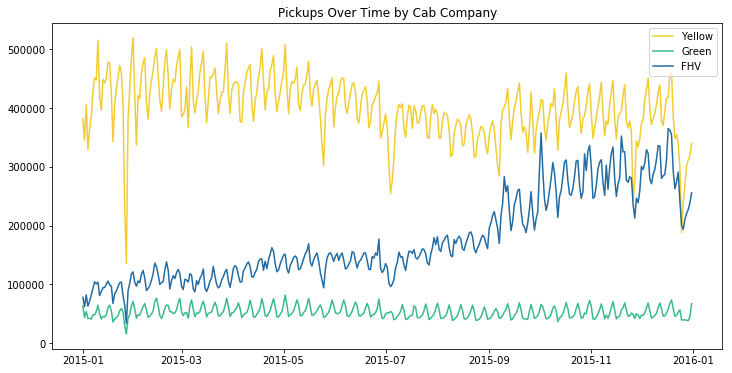

In [143]:
plt.figure(figsize=(12,6))
plt.gca().set_color_cycle(['#f2cd32', '#38ba89', '#226ba3'])

plt.plot(all_companies_pickups.Date, all_companies_pickups.Yellow)
plt.plot(all_companies_pickups.Date, all_companies_pickups.Green)
plt.plot(all_companies_pickups.Date, all_companies_pickups.FHV)

plt.title('Pickups Over Time by Cab Company')

plt.legend(loc=1)

plt.savefig('Pickups Over Time by Cab Company')

In [80]:
all_companies.sort(['Yellow Pickups'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Green Pickups,FHV Pickups,Yellow Pickups
26,2015-01-27,15406,33171,135500
358,2015-12-25,39236,200428,188254
25,2015-01-26,29869,64800,230255
359,2015-12-26,39455,193476,238646
329,2015-11-26,49041,236551,242393
184,2015-07-04,53768,95843,254353
360,2015-12-27,39514,210632,268841
330,2015-11-27,41880,212675,275078
185,2015-07-05,51192,100182,275555
249,2015-09-07,42077,169494,284320


In [ ]:
#Yellow cabs had unusually low volume on 1/27/15 and 12/25/15. I assume the second date is because of Christmas.
#1/27/15 is the date of winter storm Juno. This also explains why 1/26/15 shows the 3rd lowest volume.
#Overall, holidays have much lwoer volume. Dates near Thanksgiving and the 4th of July show fewer cab rides.
#9/7/15 was Labor Day

In [81]:
all_companies.sort(['FHV Pickups'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Green Pickups,FHV Pickups,Yellow Pickups
26,2015-01-27,15406,33171,135500
1,2015-01-02,43410,61832,345296
3,2015-01-04,41602,62691,328848
25,2015-01-26,29869,64800,230255
18,2015-01-19,35777,67340,342795
4,2015-01-05,41923,71063,363454
0,2015-01-01,62943,77789,382014
10,2015-01-11,50359,80717,419629
24,2015-01-25,52950,80802,407579
5,2015-01-06,40646,81722,384324


In [ ]:
#Highest volume for FHV Pickups is 12/17/2015.
#Not much higher than 2nd highest day, but seems like a completely normal day for other cab companies.